# **Import the needed Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import  LabelEncoder,StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_curve, roc_auc_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression ,Ridge
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("/content/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**Some Data Preprocessing From Phase One**

In [ ]:
print(df.isna().sum())#no nulls here
print(df.duplicated().sum())
df_2=df.drop_duplicates()
print(df_2.duplicated().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
1081
0


In [ ]:
df_2.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [ ]:
#Scaling Amount , Time Col
scaler = StandardScaler()
df_2["Amount"] =scaler.fit_transform(np.array(df_2["Amount"]).reshape(-1,1))
df_2["Time"] =scaler.fit_transform(np.array(df_2["Time"]).reshape(-1,1))

<ipython-input-5-3de8f3a1d336>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["Amount"] =scaler.fit_transform(np.array(df_2["Amount"]).reshape(-1,1))
<ipython-input-5-3de8f3a1d336>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["Time"] =scaler.fit_transform(np.array(df_2["Time"]).reshape(-1,1))


# **Some Trail Without the under sample methode , using only Border Line Smote**

In [ ]:
x_c = df_2.drop(['Class'], axis=1)
y_c = df_2['Class']
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x_c, y_c,test_size=0.2, random_state=42)
smote = BorderlineSMOTE(random_state=42, kind='borderline-1')
x_train_re, y_train_re = smote.fit_resample(x_train_c, y_train_c)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The BorderlineSMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


# **Trail : Using NN without under sample with sgd solver**

In [ ]:
multiclass_model = MLPClassifier(hidden_layer_sizes=(64, 32),
                                 activation='relu',
                                 solver='sgd', max_iter=500,
                                 random_state=42)
multiclass_model.fit(x_train_re, y_train_re)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42,
              solver='sgd')

In [ ]:
y_pred_2 = multiclass_model.predict(x_test_c)

In [ ]:
print("Classification Report:")
print(classification_report(y_test_c, y_pred_2))
print(f"Accuracy: {accuracy_score(y_test_c, y_pred_2):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.48      0.81      0.60        90

    accuracy                           1.00     56746
   macro avg       0.74      0.90      0.80     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy: 1.00


In [ ]:
df_tst=pd.read_csv("/content/Classification_Test_file.csv")
df_tst['Amount'] = scaler.transform(df_tst['Amount'].values.reshape(-1, 1))
df_tst['Time'] = scaler.transform(df_tst['Time'].values.reshape(-1, 1))

In [ ]:
y_pred_tst_2 = multiclass_model.predict(df_tst)
result = pd.DataFrame({
    "Class": y_pred_tst_2
})
result.to_csv("csai253-G11-2.csv", index_label="ID")

In [ ]:
df = pd.read_csv("/content/csai253-G11-2.csv")
df

,ID,Class
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
989,989,1
990,990,0
991,991,0
992,992,1


# **Trail Voting without under sample**

In [ ]:
#intialize the models that we are going to use(With two models first)
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3)
dTree_clf = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier
voting_clf_u = VotingClassifier(estimators=[
    ('sgd_clf', sgd_clf), ('dTree_clf', dTree_clf)
], voting='hard')

# Train and evaluate the voting classifier
voting_clf_u.fit(x_train_re, y_train_re)
y_pred = voting_clf_u.predict(x_test_c)
print("Classification Report:")
print(classification_report(y_test_c, y_pred))
print(f"Accuracy: {accuracy_score(y_test_c, y_pred):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.82      0.64      0.72        90

    accuracy                           1.00     56746
   macro avg       0.91      0.82      0.86     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy: 1.00


In [ ]:
y_pred_tst = voting_clf_u.predict(df_tst)

In [ ]:
result = pd.DataFrame({
    "Class": y_pred_tst
})
result.to_csv("csai253-G11_v.csv", index_label="ID")
df = pd.read_csv("/content/csai253-G11_v.csv")
df

,ID,Class
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
989,989,0
990,990,0
991,991,0
992,992,1


# **Trail : NN With adam solver**

In [ ]:
multiclass_model_3 = MLPClassifier(hidden_layer_sizes=(128, 64),
                                 activation='relu',
                                 solver='adam', max_iter=500,
                                 random_state=42)
multiclass_model_3.fit(x_train_re, y_train_re)

MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)

In [ ]:
y_pred_3 = multiclass_model_3.predict(x_test_c)

In [ ]:
print("Classification Report:")
print(classification_report(y_test_c, y_pred_3))
print(f"Accuracy: {accuracy_score(y_test_c, y_pred_3):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.83      0.78      0.80        90

    accuracy                           1.00     56746
   macro avg       0.92      0.89      0.90     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy: 1.00


In [ ]:
y_pred_tst_3 = multiclass_model_3.predict(df_tst)
result = pd.DataFrame({
    "Class": y_pred_tst_3
})
result.to_csv("csai253-G11-3.csv", index_label="ID")

In [ ]:
df = pd.read_csv("/content/csai253-G11-3.csv")
df

,ID,Class
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
989,989,1
990,990,0
991,991,0
992,992,1


# **Trail : Bagging with Random Forest Model**

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train_re, y_train_re)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_clf.predict(x_test_c)

In [ ]:
print("Classification Report:")
print(classification_report(y_test_c, y_pred))
print(f"Accuracy: {accuracy_score(y_test_c, y_pred):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.95      0.78      0.85        90

    accuracy                           1.00     56746
   macro avg       0.97      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy: 1.00


In [ ]:
y_pred_tst = rf_clf.predict(df_tst)

In [ ]:
result = pd.DataFrame({
    "Class": y_pred_tst
})
result.to_csv("csai253-G11.csv", index_label="ID")

In [ ]:
df = pd.read_csv("/content/csai253-G11.csv")
df

,ID,Class
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
989,989,1
990,990,0
991,991,0
992,992,1


# **Trail :Using SVM without Under sample.**


In [ ]:
SVM_CLass = SVC(kernel='linear',C=10)
SVM_CLass.fit(x_train_re, y_train_re)
y_pred = SVM_CLass.predict(x_test_c)
print("Classification Report:")
print(classification_report(y_test_c, y_pred))
print(f"Accuracy: {accuracy_score(y_test_c, y_pred):.2f}")

In [ ]:
y_pred_tst = SVM_CLass.predict(df_tst)

In [ ]:
result = pd.DataFrame({
    "Class": y_pred_tst
})
result.to_csv("csai253-G11_S.csv", index_label="ID")

In [ ]:
#SVM WITHOUT UNDER SAMPLE
df = pd.read_csv("/content/csai253-G11_S.csv")
df

# **Some Visualization Analysis From Phase One**

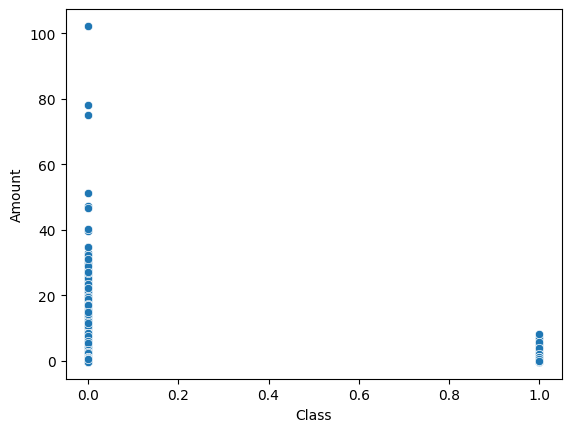

In [ ]:
sns.scatterplot(x='Class', y='Amount', data=df_2)
plt.show()

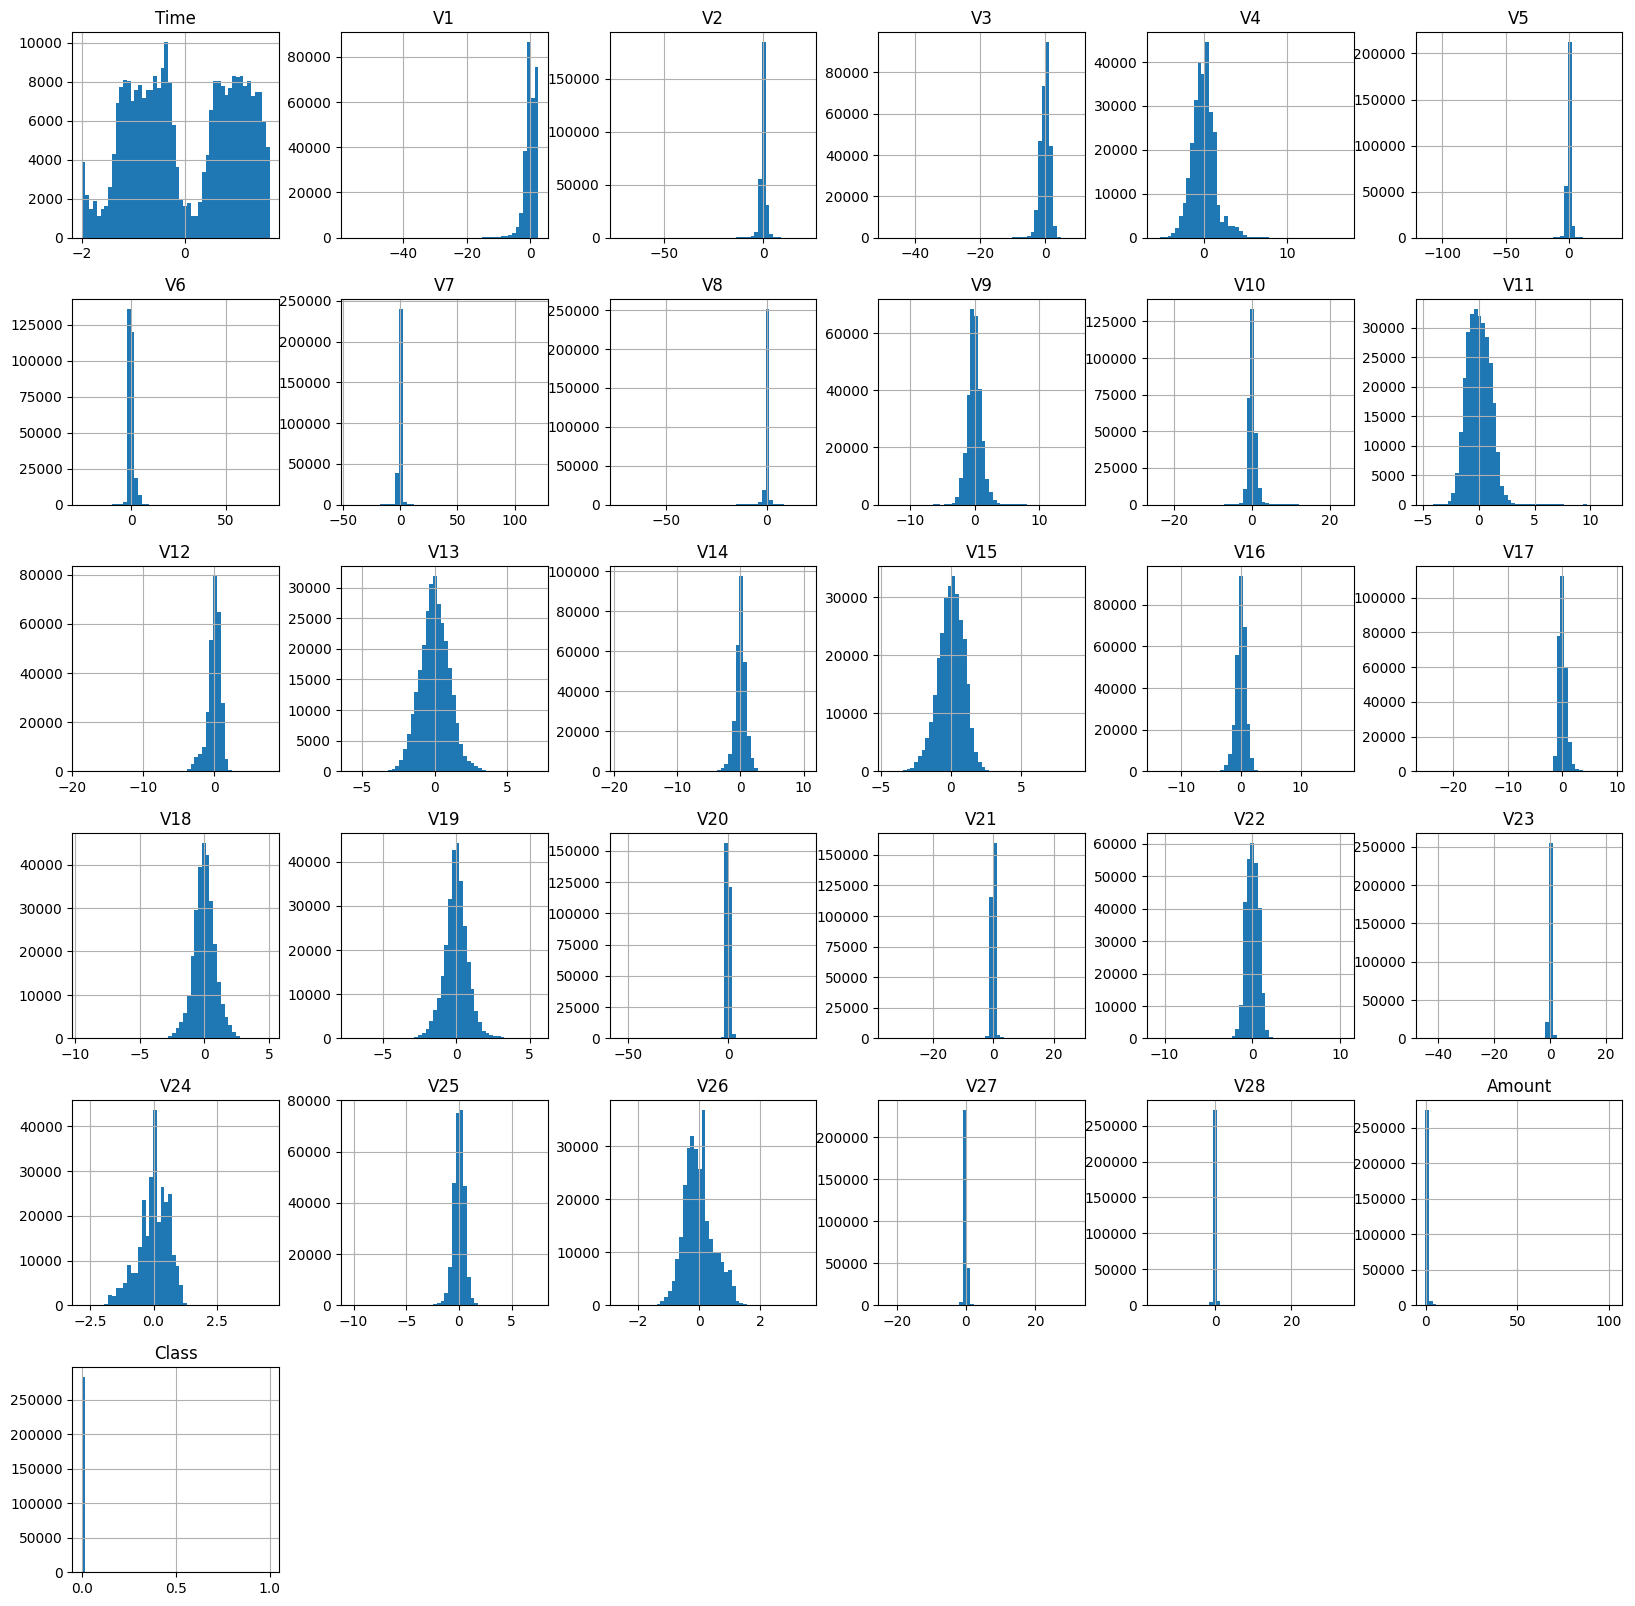

In [ ]:
df_2.hist(figsize=(20,20), bins=50)
plt.show()

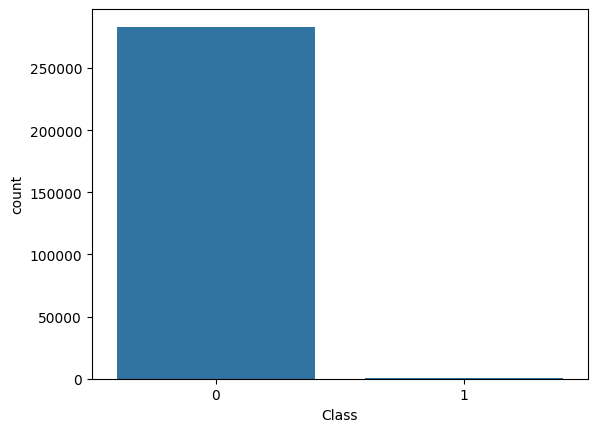

In [ ]:
sns.countplot(x='Class', data=df_2)
plt.show()#so 0 for nonfraud and 1 fraud--->Data set is imbalanced which is going to overfit the data during traning

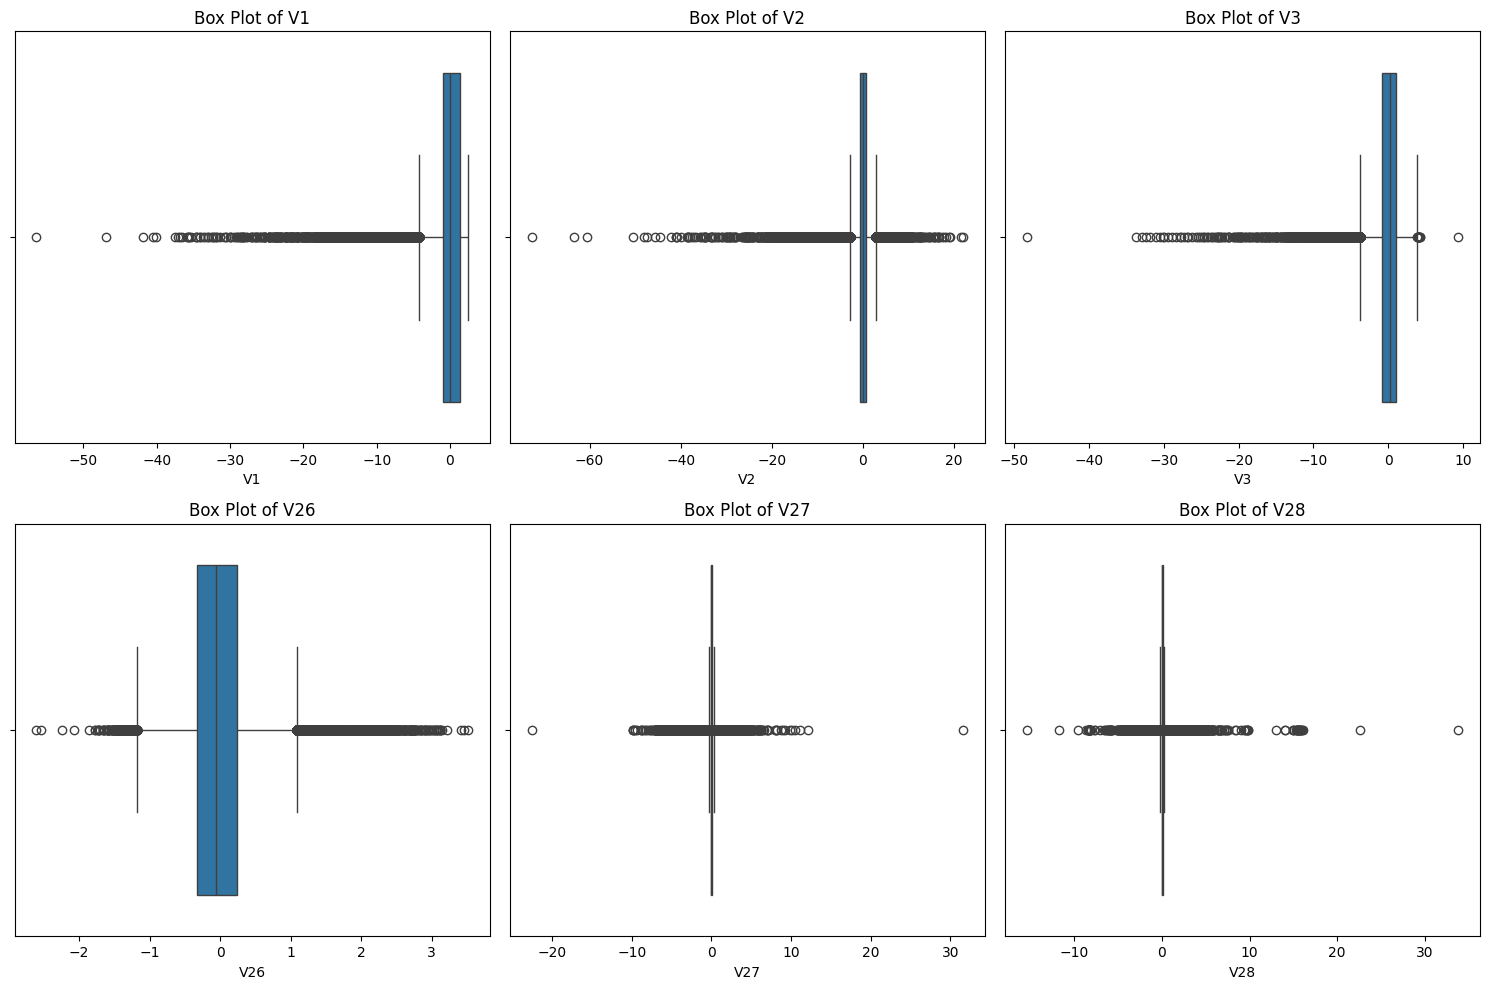

In [ ]:
numerical_features_2 = ['V1', 'V2', 'V3', 'V26', 'V27', 'V28']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features_2):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data = df_2, x = feature)
    plt.title(f'Box Plot of {feature}')
    plt.tight_layout()

plt.show()

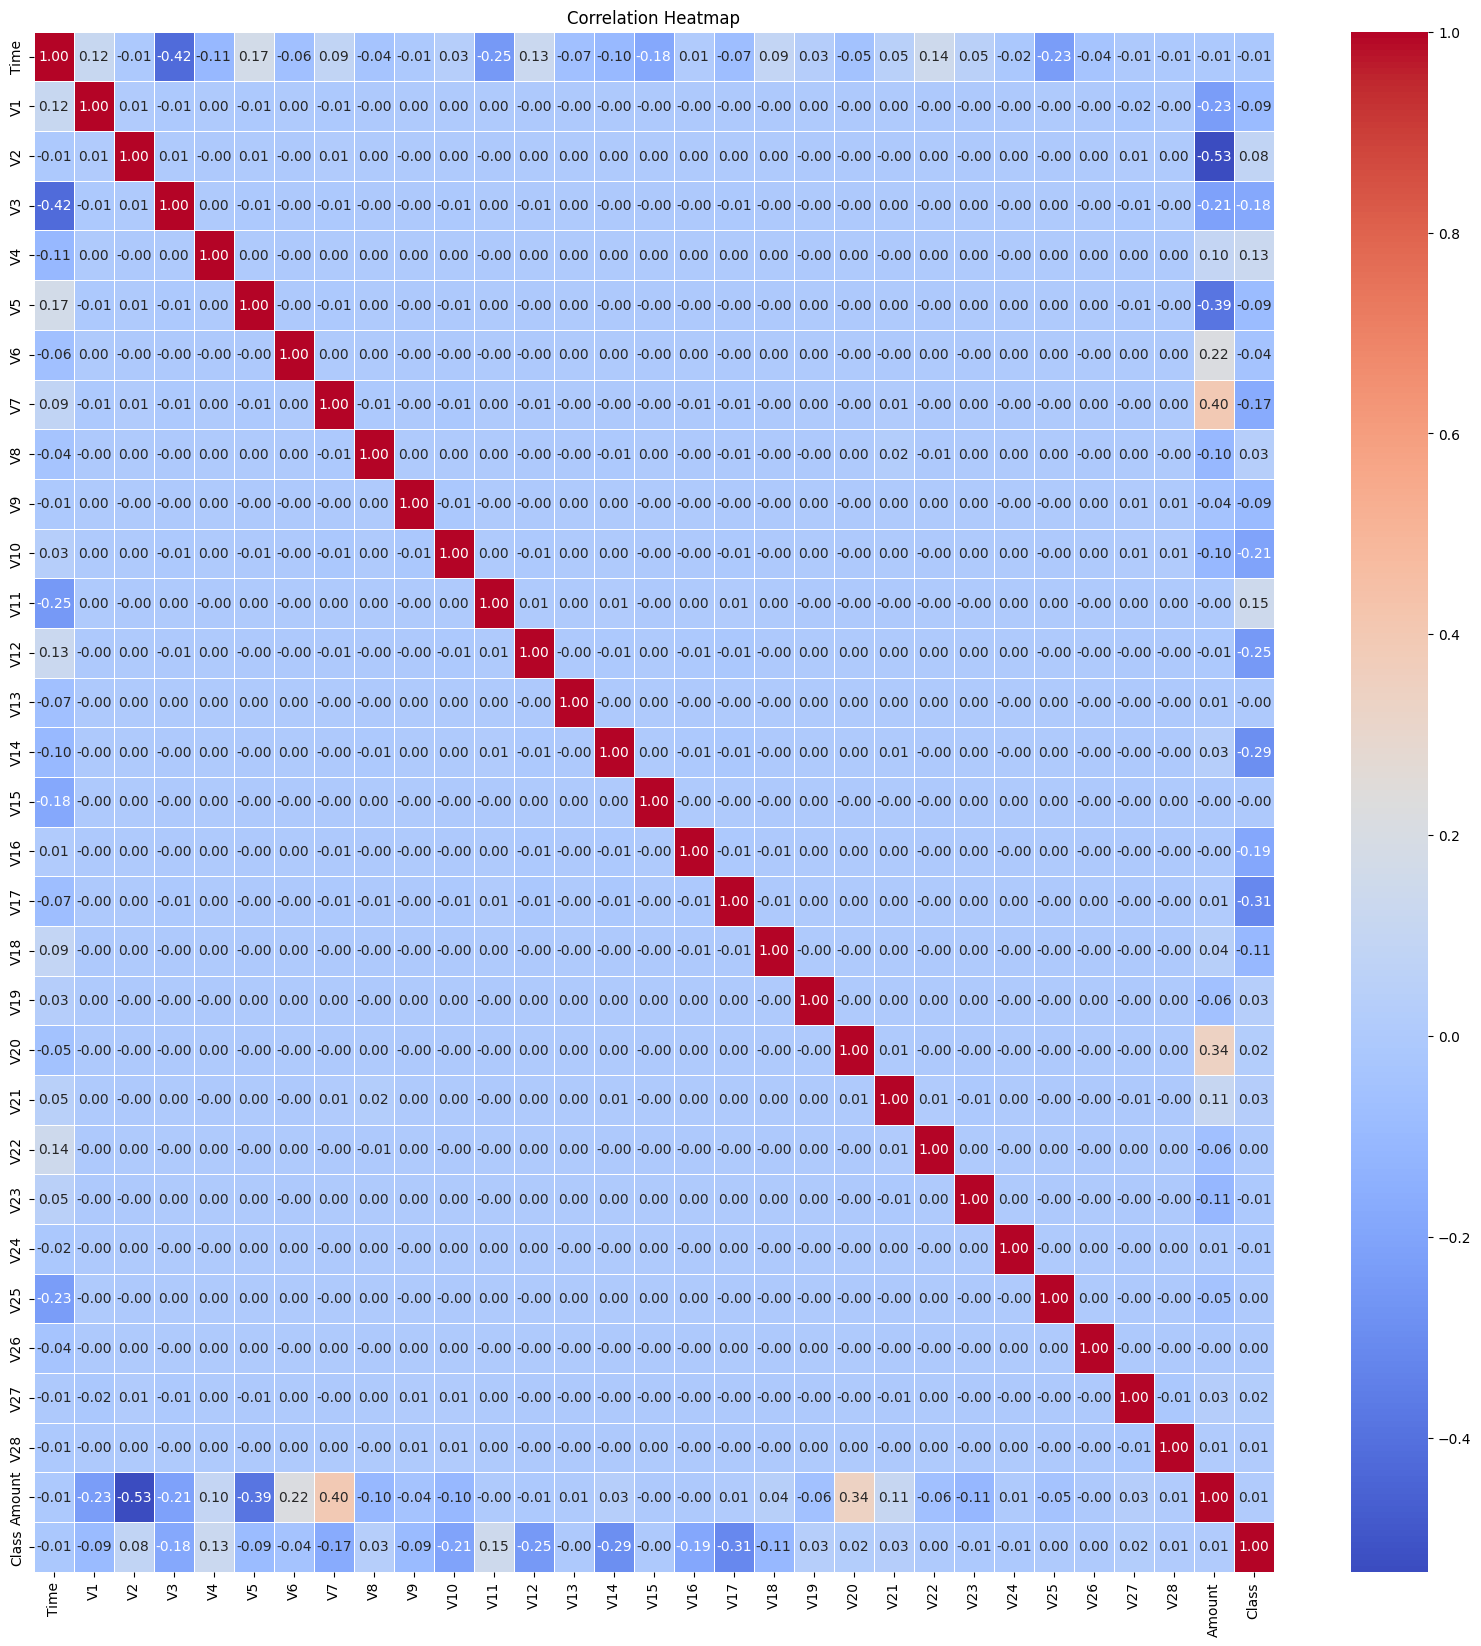

In [ ]:
correlation_matrix_2 = df_2.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# **Under Sample Method From Phase One With the trail that deepend on it**

In [ ]:
#count the number of apperance for ecah class
df_2["Class"].value_counts()

# separating for the analyzing
No_Fraud = df_2[df_2.Class == 0]
Fraud = df_2[df_2.Class == 1]

In [ ]:
#fraudulent transactions description
Fraud.Amount.describe()

,Amount
count,473.000000
mean,0.141371
std,1.039186
min,-0.353327
25%,-0.349333
50%,-0.314109
75%,0.069558
max,8.136603


In [ ]:
#normal transactions description
No_Fraud.Amount.describe()

,Amount
count,283253.000000
mean,-0.000236
std,0.999920
min,-0.353327
25%,-0.330683
50%,-0.265467
75%,-0.043981
max,102.247564


In [ ]:
#start to take a sample from No_Fraud class
No_Fraud_Sample = No_Fraud.sample(n = 473)

In [ ]:
#Desgin the new modifed balanced data set
balanced_data = pd.concat([No_Fraud_Sample,Fraud],axis = 0)
balanced_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
26080,-1.282874,0.849662,-1.786954,1.152910,-0.272744,-1.933443,0.528608,-1.274485,0.289449,0.260405,...,0.340875,0.669459,-0.331975,0.066845,0.354989,-0.092876,0.026472,0.054560,0.605942,0
106015,-0.527139,1.218326,0.050756,0.079325,-0.017878,-0.345180,-0.997185,0.205235,-0.143924,-0.247635,...,-0.386430,-1.275435,0.185119,0.336071,0.044891,0.604388,-0.112236,-0.004058,-0.243502,0
137535,-0.265371,-0.264968,0.973381,0.572789,-0.450963,0.852926,0.313037,0.522308,0.229733,-0.415173,...,-0.334199,-0.960889,-0.228333,-1.472574,0.013238,0.164246,0.233875,0.068951,-0.335395,0
255609,1.316231,1.450138,-3.028979,0.177648,-1.112798,-2.437151,1.045987,-1.916971,0.292553,-0.347819,...,0.270675,0.758260,-0.062828,0.774464,-0.546080,-0.117420,0.039475,0.034499,1.123197,0
269512,1.450306,2.321780,-1.094736,-1.450776,-1.596900,-0.893263,-1.418775,-0.480925,-0.500681,-1.790802,...,-0.307616,-0.483684,0.260421,-0.144844,-0.151278,-0.308723,-0.023087,-0.055222,-0.233518,0


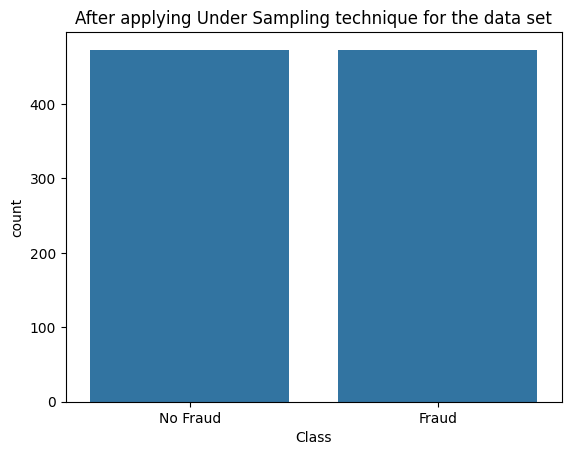

In [ ]:
#showing them after applying under sampling
sns.countplot(x='Class', data=balanced_data)
plt.title('After applying Under Sampling technique for the data set')
plt.xticks([0,1],['No Fraud','Fraud'])
plt.show()

In [ ]:
x_c = balanced_data.drop(['Class'], axis=1)
y_c = balanced_data['Class']

In [ ]:
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x_c, y_c,test_size=0.2, random_state=42)

# **Phase One Models**

In [ ]:
#Logistic Regression after using the under sample
model = LogisticRegression()
model.fit(x_train_c, y_train_c)

LogisticRegression()

In [ ]:
prediction = model.predict(x_test_c)
print("Classification Report:")
print(classification_report(y_test_c, prediction))
print(f"Accuracy: {accuracy_score(y_test_c, prediction):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        88
           1       0.96      0.91      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

Accuracy: 0.93


In [ ]:
#KNN Classifier
K_Value = range(1, 5)
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
auc_scores = []
for k in K_Value:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train_c, y_train_c)
    predicted_y_c = KNN.predict(x_test_c)
    accuracy = accuracy_score(y_test_c, predicted_y_c)
    precision = precision_score(y_test_c, predicted_y_c)
    recall = recall_score(y_test_c, predicted_y_c)
    f1 = f1_score(y_test_c, predicted_y_c)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

results = {
    'K Value': K_Value,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
}
scorecard = pd.DataFrame(results)
print(scorecard)

   K Value  Accuracy  Precision    Recall  F1 Score
0        1  0.931579   0.958763  0.911765  0.934673
1        2  0.942105   1.000000  0.892157  0.943005
2        3  0.942105   1.000000  0.892157  0.943005
3        4  0.936842   1.000000  0.882353  0.937500


# **Using of Border Line Smote**

In [ ]:
smote = BorderlineSMOTE(random_state=42, kind='borderline-1')
x_train_re, y_train_re = smote.fit_resample(x_train_c, y_train_c)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The BorderlineSMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


# Trail: Using of SVM
with Linear Kernals and c = 10

In [ ]:
SVM_CLass = SVC(kernel='linear',C=10)
SVM_CLass.fit(x_train_re, y_train_re)
y_pred = SVM_CLass.predict(x_test_c)
print("Classification Report:")
print(classification_report(y_test_c, y_pred))
print(f"Accuracy: {accuracy_score(y_test_c, y_pred):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94        88
           1       0.96      0.93      0.95       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

Accuracy: 0.94


In [ ]:
y_pred_tst = SVM_CLass.predict(df_tst)

In [ ]:
result = pd.DataFrame({
    "Class": y_pred_tst
})
result.to_csv("csai253-G11_uS.csv", index_label="ID")

In [ ]:
#SVM WITH UNDER SAMPLE
df = pd.read_csv("/content/csai253-G11_uS.csv")
df

,ID,Class
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
989,989,1
990,990,0
991,991,0
992,992,1


## Trail : Using Voting
with two models wich are SGD,Decision Tree

In [ ]:
#intialize the models that we are going to use(With two models first)
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3)
dTree_clf = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('sgd_clf', sgd_clf), ('dTree_clf', dTree_clf)
], voting='hard')

# Train and evaluate the voting classifier
voting_clf.fit(x_train_re, y_train_re)
y_pred = voting_clf.predict(x_test_c)
print("Classification Report:")
print(classification_report(y_test_c, y_pred))
print(f"Accuracy: {accuracy_score(y_test_c, y_pred):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        88
           1       0.99      0.89      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

Accuracy: 0.94


In [ ]:
y_pred_tst = voting_clf.predict(df_tst)

In [ ]:
result = pd.DataFrame({
    "Class": y_pred_tst
})
result.to_csv("csai253-G11_uv.csv", index_label="ID")

In [ ]:
df = pd.read_csv("/content/csai253-G11_uv.csv")
df

,ID,Class
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
989,989,1
990,990,0
991,991,0
992,992,1


## Trail : Using Voting
with four models wich are SGD,Decision Tree , random forest , svm

In [ ]:
#intialize the models that we are going to use(using four models)
sgd_clf = SGDClassifier(max_iter=1000,tol=1e-4)
dTree_clf = DecisionTreeClassifier(max_depth=None,random_state=42)
SVM_CLass = SVC(kernel='rbf',C=20,gamma=0.5)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
voting_clf_2 = VotingClassifier(estimators=[
    ('sgd_clf', sgd_clf), ('dTree_clf', dTree_clf) ,('SVC',SVM_CLass),('rfc',rf_clf)
], voting='hard')

# Train and evaluate the voting classifier
voting_clf_2.fit(x_train_re, y_train_re)
y_pred = voting_clf.predict(x_test_c)
print("Classification Report:")
print(classification_report(y_test_c, y_pred))
print(f"Accuracy: {accuracy_score(y_test_c, y_pred):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        88
           1       0.99      0.89      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

Accuracy: 0.94


In [ ]:
y_pred_tst = voting_clf_2.predict(df_tst)

In [ ]:
result = pd.DataFrame({
    "Class": y_pred_tst
})
result.to_csv("csai253-G11_uV2.csv", index_label="ID")

In [ ]:
df = pd.read_csv("/content/csai253-G11_uV2.csv")
df

,ID,Class
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1
...,...,...
989,989,1
990,990,0
991,991,0
992,992,1


# **Trail : Using Voting**
with five models SGD , Decision tree , SVM , random forest , nn

In [ ]:
#intialize the models that we are going to use(using four models)
sgd_clf = SGDClassifier(max_iter=1000,tol=1e-4)
dTree_clf = DecisionTreeClassifier(max_depth=None,random_state=42)
SVM_CLass = SVC(kernel='rbf',C=20,gamma=0.5)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
multiclass_model = MLPClassifier(hidden_layer_sizes=(128, 64),
                                 activation='relu',
                                 solver='adam', max_iter=500,
                                 random_state=42)

In [ ]:
voting_clf_3 = VotingClassifier(estimators=[
    ('sgd_clf', sgd_clf), ('dTree_clf', dTree_clf) ,('SVC',SVM_CLass),('rfc',rf_clf),('nn',multiclass_model)
], voting='hard')

# Train and evaluate the voting classifier
voting_clf_3.fit(x_train_re, y_train_re)
y_pred = voting_clf.predict(x_test_c)
print("Classification Report:")
print(classification_report(y_test_c, y_pred))
print(f"Accuracy: {accuracy_score(y_test_c, y_pred):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        88
           1       0.99      0.89      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

Accuracy: 0.94


In [ ]:
y_pred_tst = voting_clf_3.predict(df_tst)

In [ ]:
result = pd.DataFrame({
    "Class": y_pred_tst
})
result.to_csv("csai253-G11_all.csv", index_label="ID")

In [ ]:
df = pd.read_csv("/content/csai253-G11_all.csv")
df

,ID,Class
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1
...,...,...
989,989,1
990,990,0
991,991,0
992,992,1


# **Trail : Neural Network with under sample**

In [ ]:
NN_uSample = MLPClassifier(hidden_layer_sizes=(128, 64),
                                 activation='relu',
                                 solver='adam', max_iter=500,
                                 random_state=42)
NN_uSample.fit(x_train_re, y_train_re)

MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)

In [ ]:
y_pred= NN_uSample.predict(x_test_c)

In [ ]:
print("Classification Report:")
print(classification_report(y_test_c, y_pred))
print(f"Accuracy: {accuracy_score(y_test_c, y_pred):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        88
           1       0.95      0.91      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

Accuracy: 0.93


In [ ]:
y_pred_tst = NN_uSample.predict(df_tst)

In [ ]:
result = pd.DataFrame({
    "Class": y_pred_tst
})
result.to_csv("csai253-G11_nnu.csv", index_label="ID")

In [ ]:
df = pd.read_csv("/content/csai253-G11_nnu.csv")
df

,ID,Class
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
989,989,1
990,990,0
991,991,0
992,992,1


# **Trail Using Nural Network with Smote technique**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_re, y_train_re = sm.fit_resample(x_train_c, y_train_c)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
multiclass_model_2 = MLPClassifier(hidden_layer_sizes=(128, 64),
                                 activation='relu',
                                 solver='adam', max_iter=500,
                                 random_state=42)
multiclass_model_2.fit(x_train_re, y_train_re)

MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)

In [ ]:
y_pred= multiclass_model_2.predict(x_test_c)
print("Classification Report:")
print(classification_report(y_test_c, y_pred))
print(f"Accuracy: {accuracy_score(y_test_c, y_pred):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        88
           1       0.95      0.92      0.94       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

Accuracy: 0.93


In [ ]:
result = pd.DataFrame({
    "Class": y_pred_tst
})
result.to_csv("csai253-G11_nnu_2.csv", index_label="ID")

In [ ]:
df = pd.read_csv("/content/csai253-G11_nnu_2.csv")
df

,ID,Class
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
989,989,1
990,990,0
991,991,0
992,992,1


# **Trail : Using Stacking for classification**

In [ ]:
from sklearn.ensemble import  StackingClassifier
# Base classifiers
base_classifiers = [
    ('SVM_CLass', SVC(kernel='rbf',C=20,gamma=0.5)),
    ('sgd_clf', SGDClassifier(max_iter=1000, tol=1e-4)),
    ('dTree_clf', DecisionTreeClassifier(max_depth=None,random_state=42))
]

# Meta-model (Final estimator)
meta_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the Stacking Classifier
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Train the stacking classifier
stacking_classifier.fit(x_train_re, y_train_re)

# Evaluate the stacking classifier
y_pred_stacking_clf = stacking_classifier.predict(x_test_c)
print("Classification Report:")
print(classification_report(y_test_c, y_pred_stacking_clf))
print(f"Accuracy: {accuracy_score(y_test_c, y_pred_stacking_clf):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        88
           1       0.99      0.90      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.95      0.94       190
weighted avg       0.95      0.94      0.94       190

Accuracy: 0.94


In [ ]:
result = pd.DataFrame({
    "Class": y_pred_tst
})
result.to_csv("csai253-G11_stacking.csv", index_label="ID")

In [ ]:
df = pd.read_csv("/content/csai253-G11_stacking.csv")
df

,ID,Class
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
989,989,1
990,990,0
991,991,0
992,992,1
